# Image_Plotting

This script takes the cropped sample images from the `photo_files` sub-directory and plots together on figures that more easily enable color comparison at varying conjugated polymer concentrations and with different solvents used during film formation.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

### Loading Sample Images

In [3]:
image_files = ['../data/photos/photo_files/'+x for x in os.listdir('../data/photos/photo_files') if (x[:3] == 'CMW' and 'cropped' in x)]

In [5]:
imgs = {} # dictionary to store cropped sample images

for file in image_files:
    img = mpimg.imread(file)
    key = int(file.split('_')[0][3:])
    imgs[key] = img


### Loading Sample Meta-Data

In [27]:
# sample meta-data, including definition of sample keys
sample_info = pd.read_csv('../data/sans/Sample_Info.csv')

# helpful meta-data dictionaries
names = dict(zip(sample_info['Sample'], sample_info['Name']))
cps = dict(zip(sample_info['Sample'], sample_info['Conjugated Polymer']))
matrix = dict(zip(sample_info['Sample'], sample_info['Commodity Polymer']))
solvent_names = dict(zip(sample_info['Sample'], sample_info['Solvent']))

# target weight percents of conjugated polymer
target = dict(zip(sample_info['Sample'], sample_info['Target Fraction']*100))

# fixing 401/402 and 403/404 sample pair target values for plotting color purposes only
target[401] = 0.5
target[402] = 0.1
target[403] = 5
target[404] = 1

# loading actual conjugated polymer weight percentages
data = np.loadtxt('../data/uv_vis/Corrected_wtPercents.csv', delimiter=',', skiprows=1)
actual = {}
actual_stdev = {}
for key, tar, act, stdev, act_vol, stdev_vol in data:
    actual[key] = act
    actual_stdev[key] = stdev



### Defining sample groups for plotting

In [75]:
cps_list = []
solvent_list = []
key_list = []

# removing outliers (outliers determined during SANS data collection)
filters = [201, 202, 204, 410, 308, 40, 41, 42, 43]

for key in imgs.keys():
    if key not in filters:
        key_list.append(key)
        cps_list.append(cps[key])
        solvent_list.append(solvent_names[key])

In [76]:
# splitting up sample keys based on conjugated polymer and solvent used for easy reference during figure creation
rre_cf = np.array(key_list)[np.where((np.array(cps_list)=='RRe-P3HT') & (np.array(solvent_list)=='Chloroform'))[0]]
rra_cf = np.array(key_list)[np.where((np.array(cps_list)=='RRa-P3HT') & (np.array(solvent_list)=='Chloroform'))[0]]
p3ddt_cf = np.array(key_list)[np.where((np.array(cps_list)=='P3DDT') & (np.array(solvent_list)=='Chloroform'))[0]]
pqt_cf = np.array(key_list)[np.where((np.array(cps_list)=='PQT-12') & (np.array(solvent_list)=='Chloroform'))[0]]

rre_cf_slow = np.array(key_list)[np.where((np.array(cps_list)=='RRe-P3HT') & (np.array(solvent_list)=='Slow Dry Chloroform'))[0]]

rre_tol = np.array(key_list)[np.where((np.array(cps_list)=='RRe-P3HT') & (np.array(solvent_list)=='Toluene'))[0]]
rre_bb = np.array(key_list)[np.where((np.array(cps_list)=='RRe-P3HT') & (np.array(solvent_list)=='Bromobenzene'))[0]]

p3ddt_tol = np.array(key_list)[np.where((np.array(cps_list)=='P3DDT') & (np.array(solvent_list)=='Toluene'))[0]]
p3ddt_bb = np.array(key_list)[np.where((np.array(cps_list)=='P3DDT') & (np.array(solvent_list)=='Bromobenzene'))[0]]


### Creating Sample Photo Figures

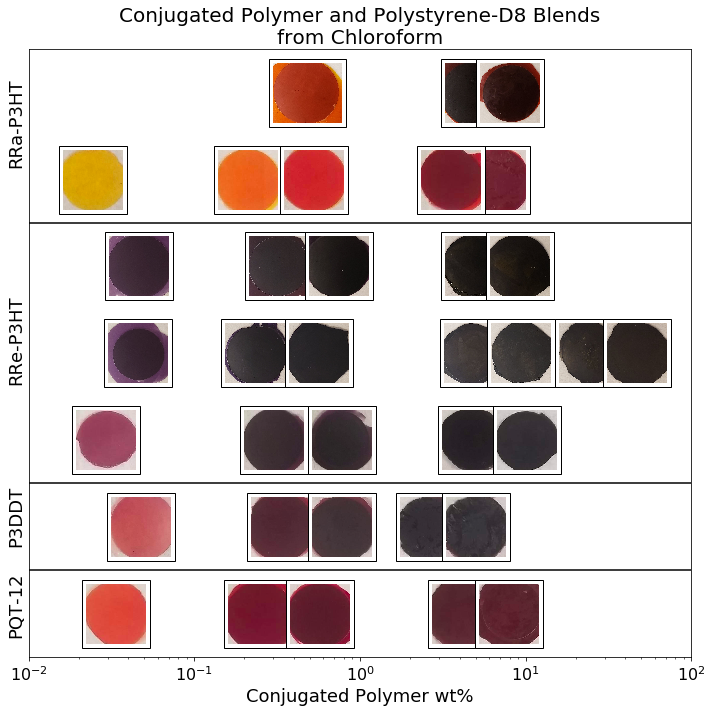

In [124]:
'''
Conjugated Polymer and PS-D8 Samples from Chloroform
'''


fig, ax = plt.subplots(figsize=(10,10))

'''
RRa-P3HT in PS-D8 from Chloroform
'''

for key in rra_cf:
    
    if key > 100:
        yloc=5.5
    else:
        yloc=4.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
plt.plot([0.001,1000],[4,4],color='black')

'''
RRe-P3HT in PS-D8 from Chloroform
'''

for key in rre_cf:
    
    if key > 107:
        yloc=3.5
    elif key > 100:
        yloc=2.5
    else:
        yloc=1.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)

plt.plot([0.001,1000],[1,1],color='black')
    

'''
P3DDT in PS-D8 from Chloroform
'''

for key in p3ddt_cf:
    
    yloc=0.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
plt.plot([0.001,1000],[0,0],color='black')

'''
PQT-12 in PS-D8 from Chloroform
'''
    
for key in pqt_cf:
    
    yloc=-0.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
'''
Overall Plot Customization
'''

plt.xlim(0.01,100)
plt.ylim(-1,6)

plt.xticks(fontsize=16)
plt.yticks([-0.1, 0.9, 3.1, 5.6],labels=['PQT-12', 'P3DDT', 'RRe-P3HT', 'RRa-P3HT'],fontsize=18,rotation=90)

ax.tick_params(axis='y',length=0)

plt.xlabel('Conjugated Polymer wt%', fontsize=18)

plt.title('Conjugated Polymer and Polystyrene-D8 Blends\nfrom Chloroform', fontsize=20)

plt.xscale('log')

plt.tight_layout()
plt.savefig('../data/photos/Photo_Figures/Photos_Chloroform.png', dpi=300)

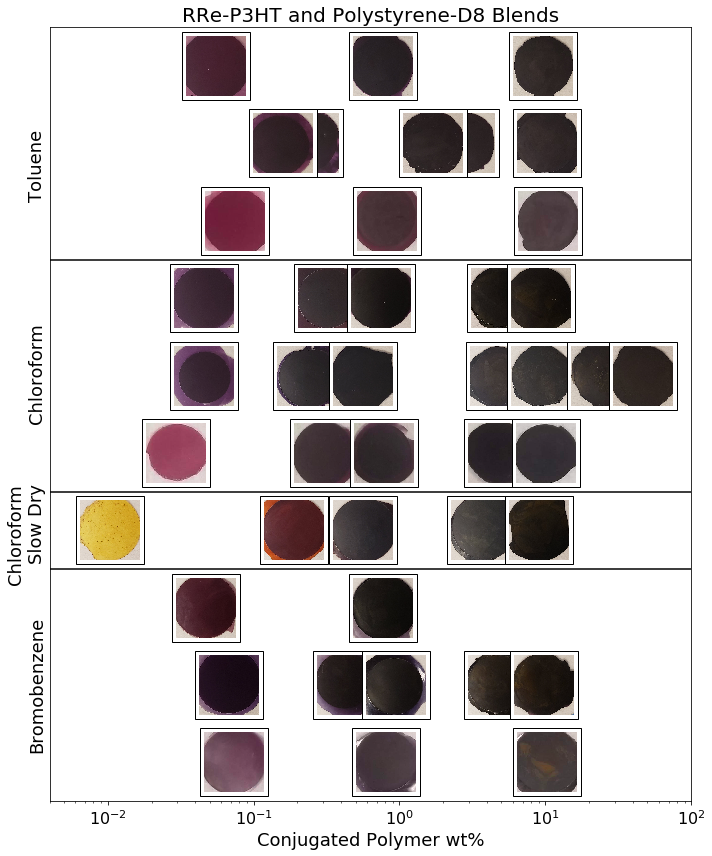

In [133]:
'''
RRe-P3HT and PS-D8 Samples from Different Solvents
'''


fig, ax = plt.subplots(figsize=(10,12))

'''
RRe-P3HT in PS-D8 from Toluene
'''

for key in rre_tol:
    
    if key > 405:
        yloc=6.5
    elif key > 400:
        yloc=5.5
    else:
        yloc=4.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
plt.plot([0.001,1000],[4,4],color='black')
    

'''
RRe-P3HT in PS-D8 from Chloroform
'''

for key in rre_cf:
    
    if key > 107:
        yloc=3.5
    elif key > 100:
        yloc=2.5
    else:
        yloc=1.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')
    ax.add_artist(ab)

plt.plot([0.001,1000],[1,1],color='black')

'''
RRe-P3HT in PS-D8 from Chloroform - Slow Dry
'''

for key in rre_cf_slow:
    
    yloc=0.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
plt.plot([0.001,1000],[0,0],color='black')
  
    
'''
RRe-P3HT in PS-D8 from Bromobenzene
'''

for key in rre_bb:
    
    if key > 305:
        yloc=-0.5
    elif key > 300:
        yloc=-1.5
    else:
        yloc=-2.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')
    ax.add_artist(ab)

'''
Overall Plot Customization
'''
    
plt.xlim(0.004,100)
plt.ylim(-3,7)

plt.xticks(fontsize=16)
plt.yticks([-0.7, 0.9, 3.1, 5.6],labels=['Bromobenzene', 'Chloroform\nSlow Dry', 'Chloroform', 'Toluene'],fontsize=18,rotation=90)

ax.tick_params(axis='y',length=0)

plt.xlabel('Conjugated Polymer wt%', fontsize=18)

plt.title('RRe-P3HT and Polystyrene-D8 Blends', fontsize=20)

plt.xscale('log')

plt.tight_layout()
plt.savefig('../data/photos/Photo_Figures/Photos_RReP3HT.png', dpi=300)

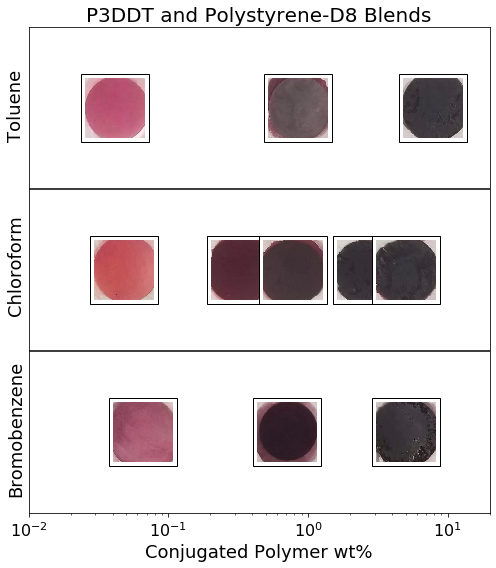

In [166]:
'''
P3DDT and PS-D8 Samples from Different Solvents
'''


fig, ax = plt.subplots(figsize=(7,8))

'''
P3DDT in PS-D8 from Toluene
'''

for key in p3ddt_tol:
    
    yloc=6.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
plt.plot([0.001,1000],[6,6],color='black')

'''
P3DDT in PS-D8 from Chloroform
'''

for key in p3ddt_cf:
    
    yloc=5.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')
    ax.add_artist(ab)

plt.plot([0.001,1000],[5,5],color='black')
  
    
'''
P3DDT in PS-D8 from Bromobenzene
'''

for key in p3ddt_bb:
    
    yloc=4.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [actual[key],yloc], xycoords='data')

    ax.add_artist(ab)
    
    
'''
Overall Plot Customization
'''
    
plt.plot([0.001,1000],[0,0],color='black')
    
plt.xlim(0.01,20)
plt.ylim(4,7)

plt.xticks(fontsize=16)
plt.yticks([4.9,5.8,6.7],labels=['Bromobenzene', 'Chloroform', 'Toluene'],fontsize=18,rotation=90)

ax.tick_params(axis='y',length=0)

plt.xlabel('Conjugated Polymer wt%', fontsize=18)

plt.title('P3DDT and Polystyrene-D8 Blends', fontsize=20)

plt.xscale('log')

plt.tight_layout()
plt.savefig('../data/photos/Photo_Figures/Photos_P3DDT.png', dpi=300)

In [147]:
# definining polystyrene control sample groups
ps_cf = [key for key in imgs.keys() if target[key] == 0 and solvent_names[key] == 'Chloroform']
ps_cf_slow = [key for key in imgs.keys() if target[key] == 0 and solvent_names[key] == 'Slow Dry Chloroform']
ps_bb = [key for key in imgs.keys() if target[key] == 0 and solvent_names[key] == 'Bromobenzene']
ps_tol = [key for key in imgs.keys() if target[key] == 0 and solvent_names[key] == 'Toluene']

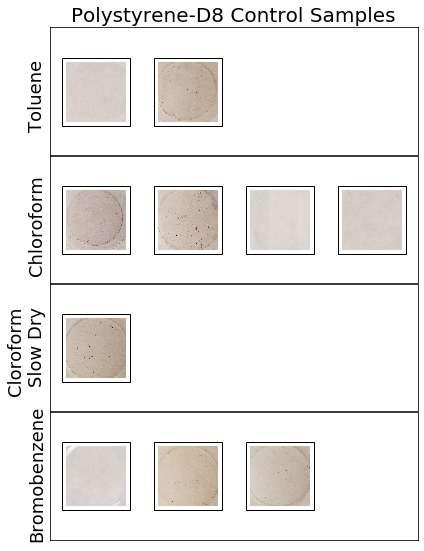

In [163]:
'''
PS-D8 Control Samples from Different Solvents
'''



fig, ax = plt.subplots(figsize=(6,8))

x = 1

'''
PS-D8 from Toluene
'''

for key in ps_tol:
    
    yloc=6.5
    
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [x,yloc], xycoords='data')
    ax.add_artist(ab)
    x+=1
    
plt.plot([0.001,1000],[6,6],color='black')

x=1

'''
PS-D8 from Chloroform
'''

for key in ps_cf:
    
    yloc=5.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [x,yloc], xycoords='data')

    ax.add_artist(ab)
    x+=1


plt.plot([0.001,1000],[5,5],color='black')

x=1

'''
PS-D8 from Chloroform - Slow Dry
''' 

for key in ps_cf_slow:
    
    yloc=4.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [x,yloc], xycoords='data')

    ax.add_artist(ab)
    x+=1
    
plt.plot([0.001,1000],[4,4],color='black')

x = 1

'''
PS-D8 from Bromobenzene
'''

for key in ps_bb:
    
    yloc=3.5
    
    arr_img = imgs[key]

    imagebox = OffsetImage(arr_img, zoom=60/(np.shape(arr_img)[0]))
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, [x,yloc], xycoords='data')

    ax.add_artist(ab)
    x+=1

    
'''
Overall Plot Customization
'''

plt.xlim(0.5,4.5)
plt.ylim(3,7)

plt.xticks([],fontsize=16)
plt.yticks([4,4.7,5.8,6.7],labels=['Bromobenzene', 'Cloroform\nSlow Dry', 'Chloroform', 'Toluene'],fontsize=18,rotation=90)

ax.tick_params(axis='y',length=0)


plt.title('Polystyrene-D8 Control Samples', fontsize=20)


plt.tight_layout()
plt.savefig('../data/photos/Photo_Figures/Photos_PSD8.png', dpi=300)